<b>Gemini and Vertex can generate images for online sales</b>

Gemini, Google's latest and most advanced model, can help you create beautiful images with Vertex's image generation API. Use this notebook to generate images you can use for online marketing.

<b>[Required] Set up a Google Cloud account</b>

Okay so we get it, this part is hard, but in order to use the Cloud speech-to-text API you need to set up a Cloud account, project, and billing. Start [here](https://console.cloud.google.com/getting-started).

Once you've done that, come back here.

In [2]:
#@title Authenticate with Google Cloud and your project ID

import vertexai
from vertexai.preview.vision_models import Image, ImageGenerationModel

from google.colab import auth

gcp_project_id = 'advait-450518' # @param {type: "string"}

auth.authenticate_user(project_id=gcp_project_id)

vertexai.init(project=gcp_project_id)

In [3]:
#@title Configure Gemini API key

#Access your Gemini API key

import google.generativeai as genai
from google.colab import userdata

gemini_api_secret_name = 'API_KEY'  # @param {type: "string"}

try:
  GOOGLE_API_KEY=userdata.get(gemini_api_secret_name)
  genai.configure(api_key=GOOGLE_API_KEY)
except userdata.SecretNotFoundError as e:
   print(f'Secret not found\n\nThis expects you to create a secret named {gemini_api_secret_name} in Colab\n\nVisit https://makersuite.google.com/app/apikey to create an API key\n\nStore that in the secrets section on the left side of the notebook (key icon)\n\nName the secret {gemini_api_secret_name}')
   raise e
except userdata.NotebookAccessError as e:
  print(f'You need to grant this notebook access to the {gemini_api_secret_name} secret in order for the notebook to access Gemini on your behalf.')
  raise e
except Exception as e:
  # unknown error
  print(f"There was an unknown error. Ensure you have a secret {gemini_api_secret_name} stored in Colab and it's a valid key from https://makersuite.google.com/app/apikey")
  raise e

model = genai.GenerativeModel('gemini-pro')

In [4]:
#@title Use Gemini to generate an image prompt for your item

item_selling = 'facebook logo' #@param {type: "string"}

model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])

prompttext = f"""
  I'm selling {item_selling} online, and I need to generate an image of it.
  I need the image to be compelling and interesting to convince people to buy.
  Can you create a prompt I can use to generate an image of {item_selling} with Vertex?
  Respond with only the prompt, no other text. Be as verbose as possible.
  """

response = chat.send_message(prompttext)

response.text

'Generate an image of the Facebook logo with Vertex that is compelling and interesting to convince people to buy. The image should be high-resolution, with vibrant colors and a dynamic composition. Use creative lighting and effects to make the logo stand out and grab attention. Showcase the logo in a way that highlights its unique design and iconic status.'

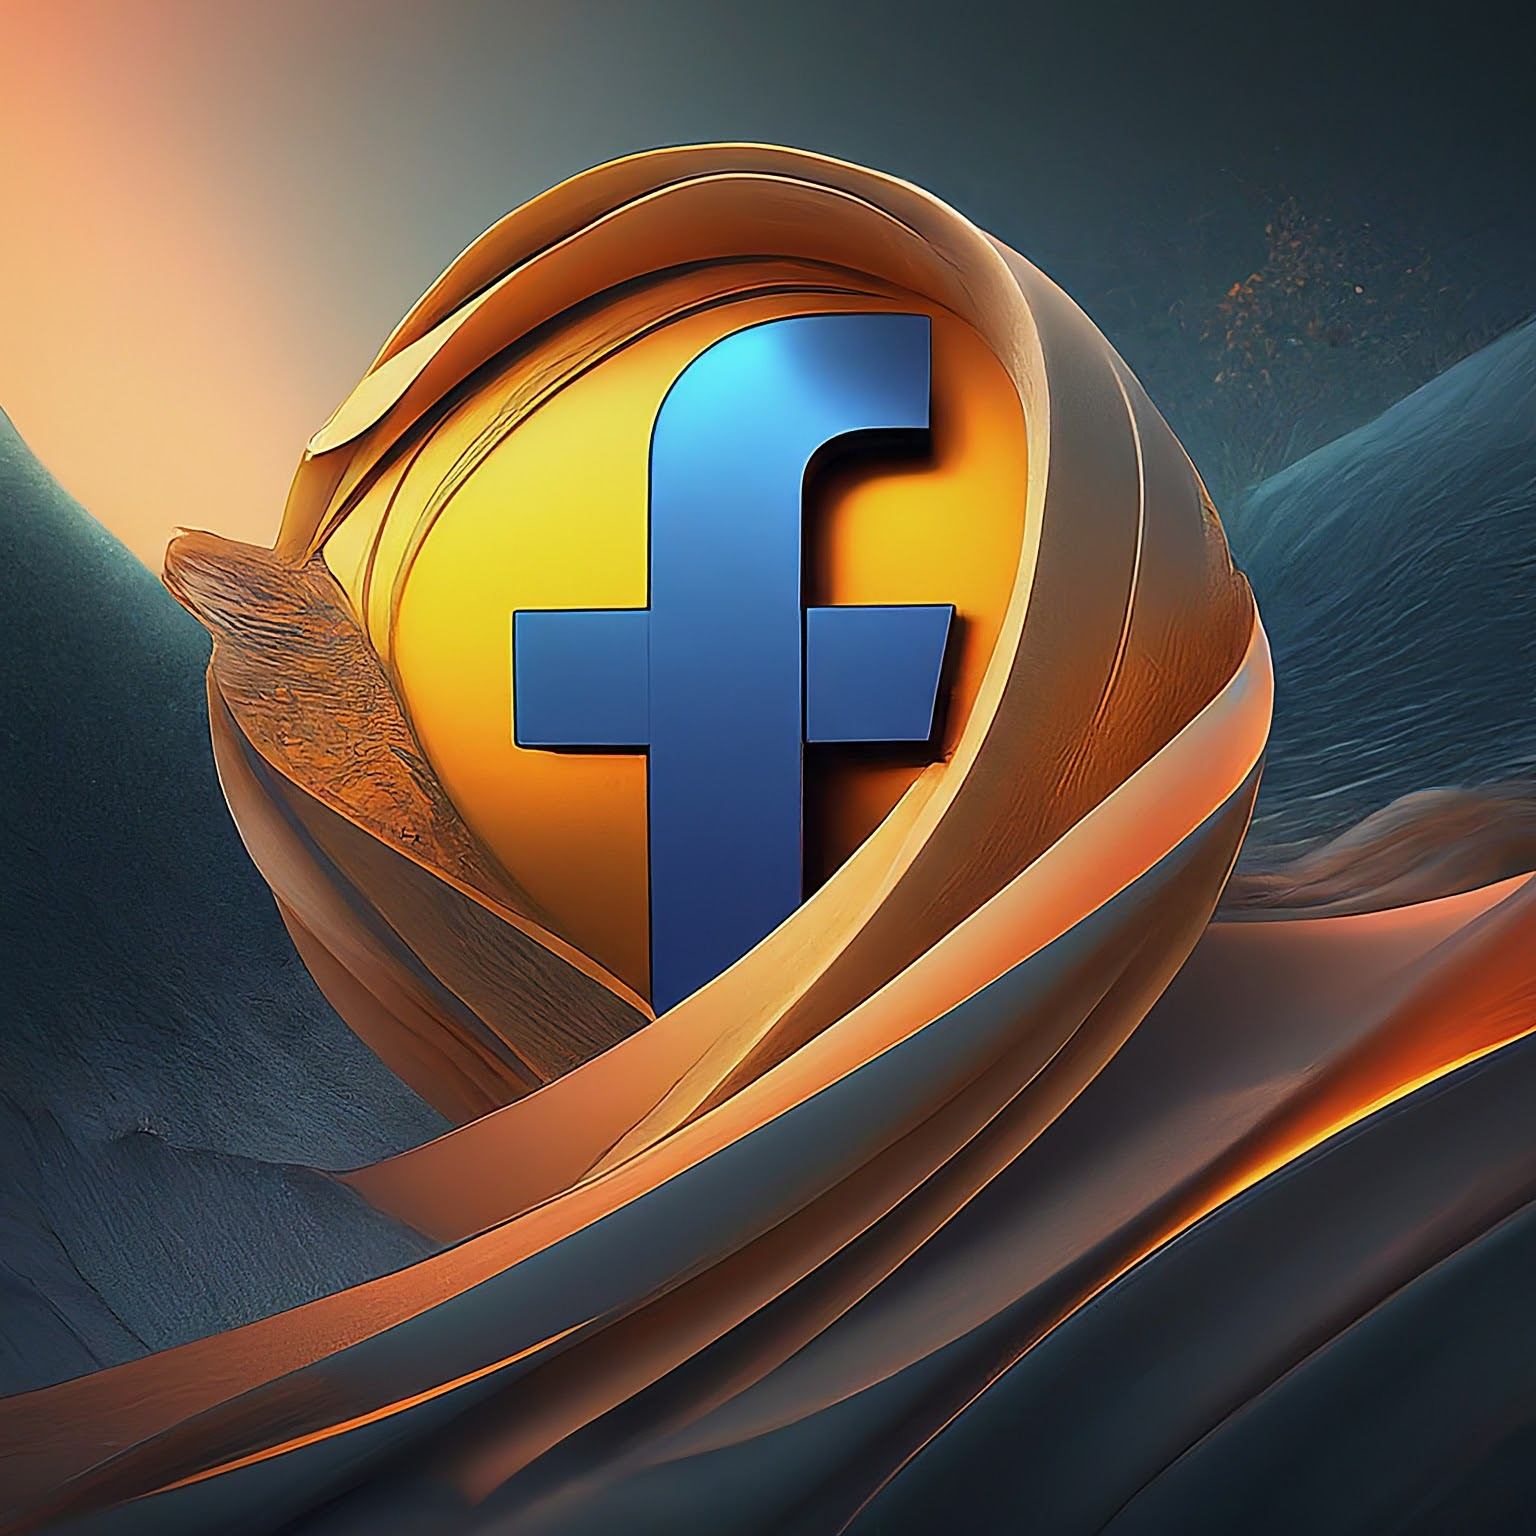

In [6]:
#@title Use Vertex to generate an image

from IPython.display import Image

model = ImageGenerationModel.from_pretrained("imagegeneration@005")
images = model.generate_images(prompt=response.text)

images[0].save(location="./gen-img1.png", include_generation_parameters=True)

Image('./gen-img1.png', height=500)

In [7]:
! git clone https://github.com/deepseek-ai/janus

Cloning into 'janus'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 121 (delta 51), reused 36 (delta 36), pack-reused 47 (from 2)
Receiving objects: 100% (121/121), 7.19 MiB | 28.10 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [18]:
!ls

gen-img1.png  janus  sample_data


In [20]:
!pwd


/content


In [23]:
!ls -l


total 2872
drwxr-xr-x 2 root root    4096 Feb 17 04:01 demo
-rw-r--r-- 1 root root    4515 Feb 17 04:01 generation_inference.py
drwxr-xr-x 2 root root    4096 Feb 17 04:01 images
-rw-r--r-- 1 root root    2642 Feb 17 04:01 inference.py
-rw-r--r-- 1 root root    5188 Feb 17 04:01 interactivechat.py
drwxr-xr-x 5 root root    4096 Feb 17 04:01 janus
-rw-r--r-- 1 root root 2846268 Feb 17 04:01 janus_pro_tech_report.pdf
-rw-r--r-- 1 root root    1065 Feb 17 04:01 LICENSE-CODE
-rw-r--r-- 1 root root   13718 Feb 17 04:01 LICENSE-MODEL
-rw-r--r-- 1 root root    3069 Feb 17 04:01 Makefile
-rw-r--r-- 1 root root    1111 Feb 17 04:01 pyproject.toml
-rwxr-xr-x 1 root root   26781 Feb 17 04:01 README.md
-rw-r--r-- 1 root root     278 Feb 17 04:01 requirements.txt


In [22]:
%cd /content/janus


/content/janus


In [24]:
!pip install -e


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

-e option requires 1 argument


In [27]:
!pip install --upgrade transformers
import os
import torch
import PIL.Image
import numpy as np
from transformers import AutoModel
from transformers import AutoModelForCausalLM

from janus.models import MultiModalityCasualLM, VLChatProcessor
from janus.utils.io import load_pil_images

ModuleNotFoundError: No module named 'janus.models'

In [43]:
import sys
from janus import models

sys.path.append('/content/janus/janus')
sys.path.append('/content/janus/janus/models')

# Now try the import again
from janus.janus.models.modeling_vlm import MultiModalityCausalLM
from janus.janus.models.processing_vlm import VLChatProcessor


ImportError: cannot import name 'models' from 'janus' (unknown location)